In [3]:
import umap
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.stats 
from scipy.ndimage import gaussian_filter1d
import sys
sys.path.append('./helpers')
import loadmat as lm
import helpers as helpers
from sklearn import linear_model
# %matplotlib widget
from sklearn.decomposition import PCA

In [5]:
data = lm.loadmat(r'/Users/attialex/npJ5_0506_dark_1.mat')

In [6]:
spikes,X,t_edges = helpers.calculateFiringRate(data,t_edges = data['post'])

In [7]:
speed = helpers.calcSpeed(data['posx'])

In [8]:
data_xcorr = lm.loadmat(r'/Users/attialex/npJ5_0506_dark_1_out.mat')

In [9]:
data_out=data_xcorr['data_out']

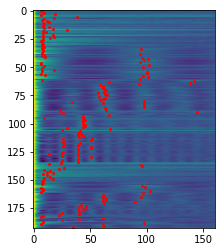

In [10]:
plt.figure()
plt.imshow(data_out['xcorrs'][data_out['pvals']<0.05,:])
plt.scatter(data_out['peak_loc_all'][data_out['pvals']<0.05]/5,np.arange(np.sum(data_out['pvals']<0.05)),s=4,c='r')

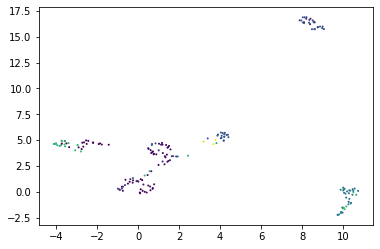

In [56]:
idx = data_out['pvals']<0.05
xcorrs = data_out['xcorrs'][idx]
# pca = PCA(n_components=2)
# X_new=pca.fit_transform(xcorrs)
reducer = umap.UMAP(n_components=2)
# reducer = PCA(n_components=2)
X_new = reducer.fit_transform(xcorrs)
plt.figure()
plt.scatter(X_new[:,0],X_new[:,1],marker='.',s=4,c=data_out['peak_loc_all'][idx])


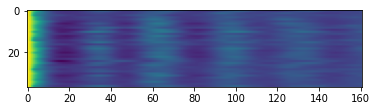

In [18]:
idx2=X_new[:,1]<2
plt.imshow(xcorrs[idx2,:])

In [57]:
from sklearn.cluster import DBSCAN,KMeans
db = DBSCAN(eps=0.3,min_samples=5).fit(X_new)
dbk = KMeans(n_clusters=5).fit(X_new)

In [39]:
dbk.labels_

array([5, 3, 3, 3, 5, 5, 3, 4, 5, 5, 5, 5, 3, 5, 3, 5, 5, 5, 3, 5, 3, 5,
       5, 3, 3, 5, 5, 5, 3, 5, 5, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 3, 1, 2, 1, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 1, 3, 2, 1, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 5, 2, 5, 1, 3, 1,
       0, 1, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 3, 3, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 3, 3, 4, 2, 0, 0, 5, 4, 3, 2, 2, 2], dtype=int32)

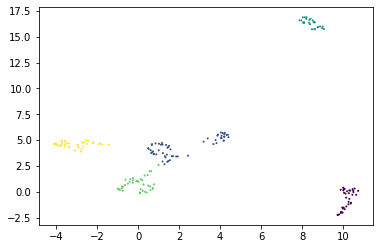

In [58]:
plt.figure()
plt.scatter(X_new[:,0],X_new[:,1],marker='.',s=4,c=dbk.labels_)

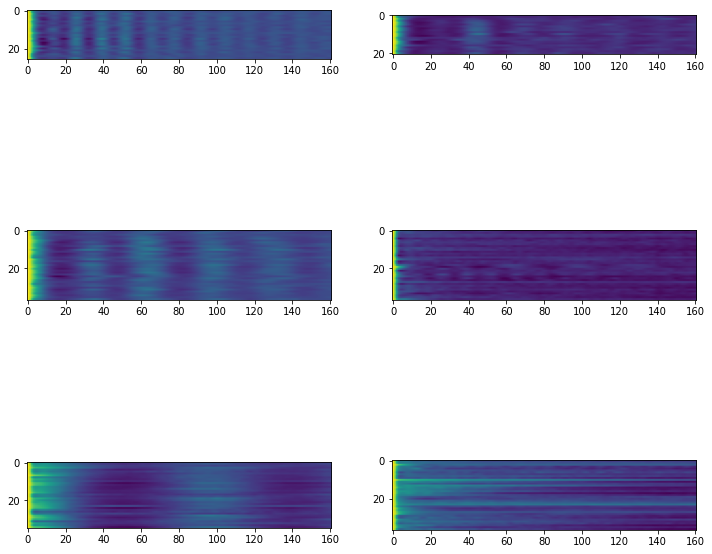

In [42]:
u_labs = np.unique(dbk.labels_)
(fig,axs)=plt.subplots(3,2,figsize=(12,12))
axs=axs.flatten()
for i,ax in enumerate(axs):
    idx = dbk.labels_==u_labs[i]
    ax.imshow(xcorrs[idx])

In [32]:
u_labs = np.unique(db.labels_)
u_labs

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

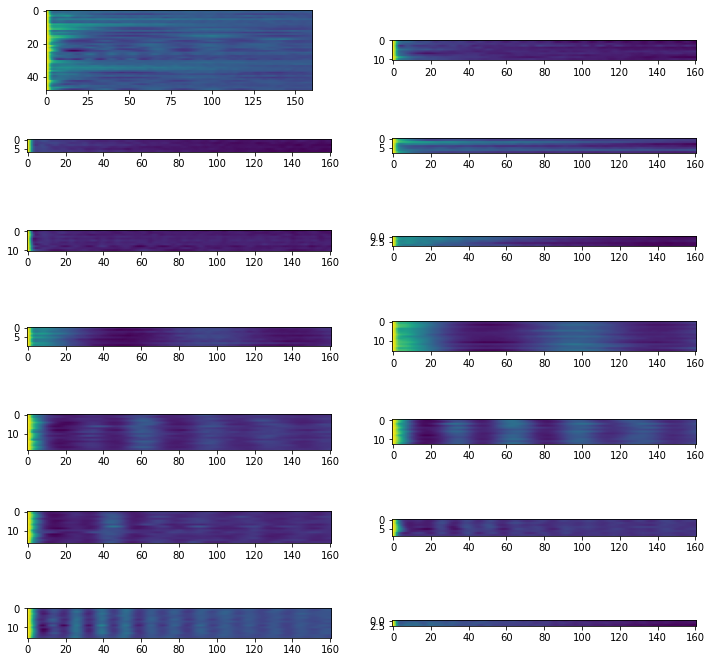

In [41]:
(fig,axs)=plt.subplots(7,2,figsize=(12,12))
axs=axs.flatten()
for i,ax in enumerate(axs):
    idx = db.labels_==u_labs[i]
    ax.imshow(xcorrs[idx])

In [44]:
# idx = np.logical_and(np.logical_and(data_out['pvals']<0.05,data_out['peak_loc_all']>60*5),data_out['peak_loc_all']<70*5)
idx = np.logical_and(np.logical_and(data_out['pvals']<0.01,data_out['peak_loc_all']>23*5),data_out['peak_loc_all']<41*5)
# idx = data_out['pvals']<0.05

In [32]:
plt.close('all')

In [39]:
plt.figure()
plt.imshow(data_out['xcorrs'][idx,:],aspect='auto')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

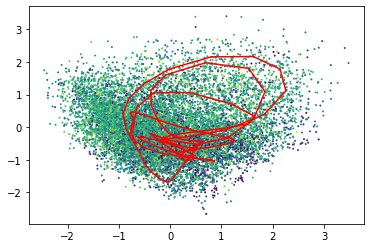

In [45]:
X=gaussian_filter1d(spikes[speed>2,:], 15, axis=0)
speed_ds = speed[speed>2]
speed_ds = speed_ds[::10]
X_z=scipy.stats.zscore(X[::10,idx],axis=1)
pca = PCA(n_components=6)
X_new=pca.fit_transform(X_z)
plt.figure()
plt.scatter(X_new[:,0],X_new[:,1],marker='.',s=4,c=speed_ds)
plt.plot(X_new[2100:2200,0],X_new[2100:2200,1],'r')

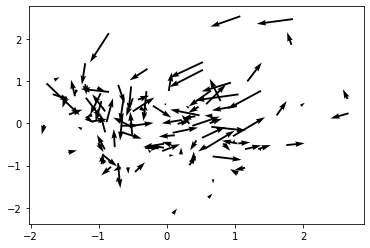

In [46]:
dx = np.diff(X_new[:,0])
dy = np.diff(X_new[:,1])
dx = dx[::100]
dy = dy[::100]
X=X_new[0:-1:100,0]
Y=X_new[0:-1:100,1]
fig, ax = plt.subplots()
q = ax.quiver(X, Y, dx, dy)

In [84]:
plt.close('all')

In [52]:
# reducer = umap.UMAP(n_components=3,metric='cosine',n_neighbors=500,init='spectral',min_dist=0.8)
#reducer = umap.UMAP(n_components=3,metric='cosine',init='spectral',min_dist=0.8)
reducer = umap.UMAP(n_components=2,metric='cosine',min_dist = 1)
Xu = reducer.fit_transform(X_z)

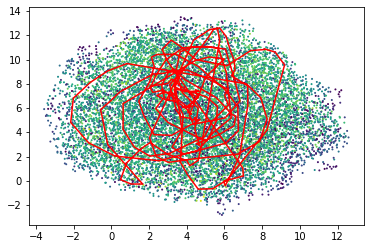

In [53]:
plt.figure()
plt.scatter(Xu[:,0],Xu[:,1],marker='.',s=4,c=speed_ds)
plt.plot(Xu[2800:3000,0],Xu[2800:3000,1],'r')

In [93]:
plt.figure()
plt.scatter(Xu[:,0],Xu[:,1],marker='.',s=4,c=speed_ds)
plt.plot(Xu[2800:3000,0],Xu[2800:3000,1],'r')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

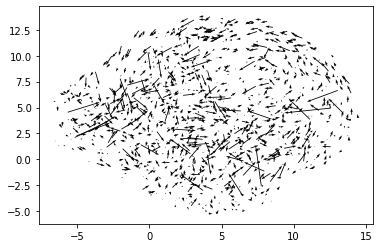

In [51]:
dx = np.diff(Xu[:,0])
dy = np.diff(Xu[:,1])
dx = dx[::10]
dy = dy[::10]
X=Xu[0:-1:10,0]
Y=Xu[0:-1:10,1]
fig, ax = plt.subplots()
q = ax.quiver(X, Y, dx, dy)

In [108]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xu[:,0],Xu[:,1],Xu[:,2],marker='.',s=4)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [58]:
import matplotlib;matplotlib.__version__

'3.1.1'